# Лабораторная работа №2: Случайный лес

#Постановка задачи
Построить графики зависимости:
- Метрики качества классификации от кол-во деревьев.
- Качество обучения от глубины деревьев

# Подключение зависимостей

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Генерация набора данных

In [ ]:
X, Y = make_classification(n_samples=500, n_features=3,
                           n_informative=3, n_classes=5,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=12)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Инициализация и обучение классификатора

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.71


# Определение зависимости качества от кол-ва деревьев

In [ ]:
scores = []
n_estimators = np.arange(25,800,50)

In [ ]:
for i in n_estimators:
    clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=i)
    clf.fit(X, Y)
    scores.append(clf.score(X,Y))

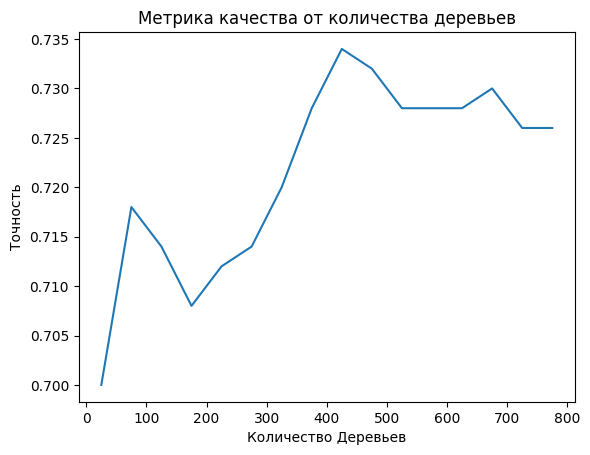

In [ ]:
plt.plot(n_estimators, scores)
plt.xlabel('Количество Деревьев')
plt.ylabel('Точность')
plt.title('Метрика качества от количества деревьев')
plt.show()

# Определение зависимости качества от глубины деревьев

In [ ]:
accuracies = []
n_depths = np.arange(2,20,2)

In [ ]:
for i in n_depths:
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X, Y)
    accuracies.append(clf.score(X,Y))

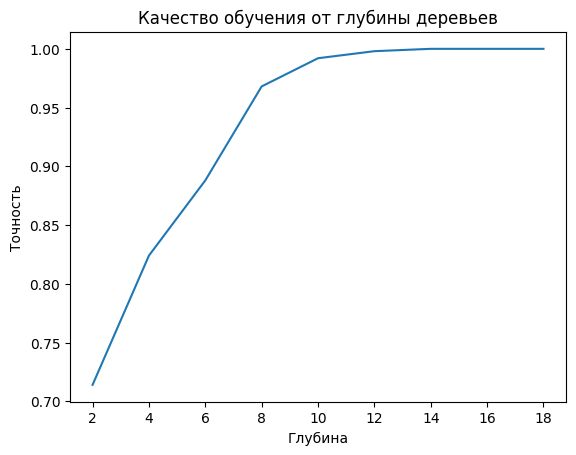

In [ ]:
plt.plot(n_depths, accuracies)
plt.xlabel('Глубина')
plt.ylabel('Точность')
plt.title('Качество обучения от глубины деревьев')
plt.show()